# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Mount GitHub
! git clone https://github.com/DS3001/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

In [3]:
# Load Dataset
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [4]:
# Average scores by Neighbourhood
df.loc[:,['Review Scores Rating','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Review Scores Rating                                         \
                              count       mean       std   min   25%   50%   
Neighbourhood                                                                
Bronx                         217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                     8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                   11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                       1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                  96.0  90.843750  9.137923  40.0  87.0  92.0   

                              
                  75%    max  
Neighbourhood                 
Bronx            99.0  100.0  
Brooklyn        100.0  100.0  
Manhattan        99.0  100.0  
Queens          100.0  100.0  
Staten Island    97.0  100.0

In [5]:
# Average prices by Neighbourhood
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

> On average, Manhatten is the most expensive borough at $183.66 per night.

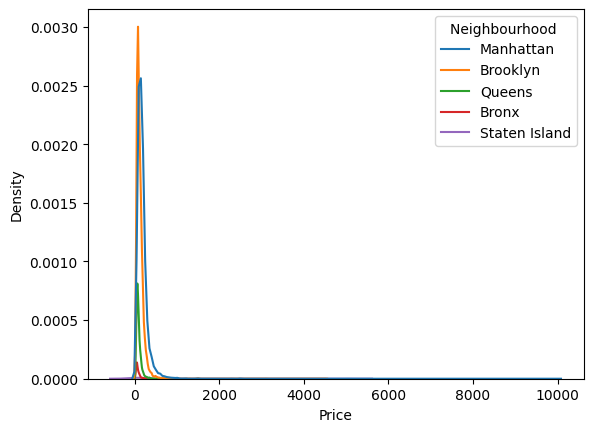

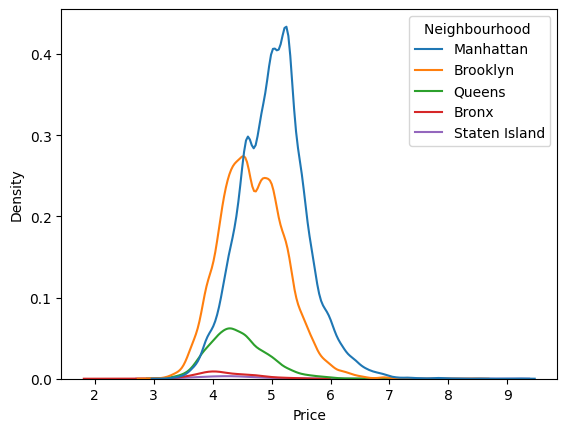

In [6]:
# kernel density plot of price, grouped by Neighborhood
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

# kernel density plot of log price, grouped by Neighborhood
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [7]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


> The coefficients on the neighborhood dummy are the same as the means calculated in Q1.1, because there are not any control variables in the model.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [8]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


> When creating these dummies, the code drops one group (the Bronx) from the regression and makes it the reference category. Its previous coefficient (75.276498) is now the intercept value (`reg.intercept_`).

> In this regression, the coefficients are relative to the reference category. For example, on average, Manhatten prices are $108.38 more expensive per night than prices in the Bronx.

> To get the Q1.2 coefficients from these coefficients, add the regression coefficient values to the intercept.

In [9]:
print(reg.intercept_)

75.27649769585331


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80/20 split)
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

# Create dummy variables for 'Neighbourhood' and concatenate them with 'Review Scores Rating' for training and test sets
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis=1)

# Fit linear regression model without intercept to training data
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

# Predict prices on test set
y_hat = reg.predict(Z_test)

# Calculate R-squared
print('Rsq: ', reg.score(Z_test, y_test)) # R2

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_hat) ** 2))
print('RMSE: ', rmse) # Root Mean Square Error

# Create DataFrame to display regression coefficients
results = pd.DataFrame({'variable': Z_train.columns, 'coefficient': reg.coef_})
results

Rsq:  0.054501297090503886
RMSE:  147.19906718095692


,variable,coefficient
0,Review Scores Rating,1.096610
1,Bronx,-26.858383
2,Brooklyn,26.214435
3,Manhattan,81.261434
4,Queens,-3.462161
5,Staten Island,57.908441


In [11]:
100 * reg.coef_[0] +  reg.coef_[3]

190.9224367524605

> The coefficient on `Review Scores Rating` is 1.097.

> The most expensive kind of property you can rent is an apartment in Manhatten with a rating of 100 at $190.92 per night.

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [12]:
# Define independent variables (features) and dependent variable (target)
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type']]
y = df['Price']

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Create dummy variables for 'Neighbourhood' and 'Room Type' and concatenate them with 'Review Scores Rating' for training and test sets
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                     pd.get_dummies(X_train['Room Type'], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')], axis=1)

# Fit linear regression model without intercept to training data
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

# Predict prices on test set
y_hat = reg.predict(Z_test)

# Calculate R-squared
print('Rsq: ', reg.score(Z_test, y_test)) # R2

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_hat) ** 2))
print('RMSE: ', rmse) # Root Mean Square Error

# Create DataFrame to display regression coefficients
results = pd.DataFrame({'variable': Z_train.columns, 'coefficient': reg.coef_})
results

Rsq:  0.1802428151255765
RMSE:  137.06204428035045


,variable,coefficient
0,Review Scores Rating,0.670215
1,Bronx,-14.855228
2,Brooklyn,9.413026
3,Manhattan,51.017992
4,Queens,-9.648686
5,Staten Island,50.758619
6,Entire home/apt,107.073722
7,Private room,1.292203
8,Shared room,-21.680202


In [13]:
100 * reg.coef_[0] +  reg.coef_[3] + reg.coef_[6]

225.1131717798347

> The coefficient on Review Scores Rating is 0.670.

> The most expensive kind of property you can rent would be an entire home/apt in Manhatten with a rating of 100 at $225.11 per night

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

> In Q1.4, the coefficient for "Review Scores Rating" was 1.096610. This coefficient indicates its impact on prices without considering room types. In Q1.5, which includes room types as a variable, the coefficient reduced to 0.670215. This suggests that the variation in prices by rating and neighborhood is partially associated with room types. When we control for room type, the predictive power of the other variables decreases, leading to a reduced coefficient for rating as its influence becomes correlated with room type.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [14]:
data = pd.read_csv('/content/linearRegression/data/cars_hw.csv')
cars = data # Create duplicate df for cleaning

# View dataframe
cars

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


<Axes: >

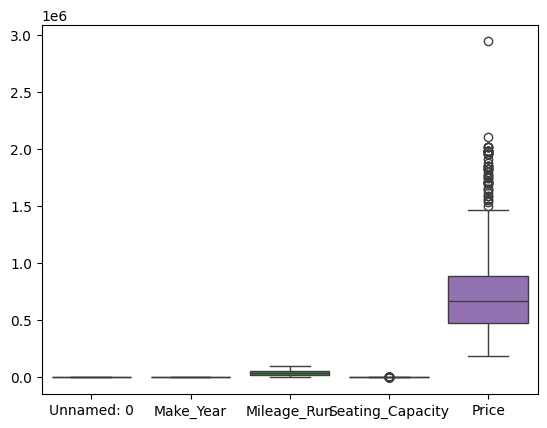

In [15]:
# Use boxplot to check distribution of data
sns.boxplot(data=cars)

In [16]:
# Apply arcsinh transformation to the 'Price' and 'Mileage_Run' columns and store the results in new columns
cars['archsinh_price'] = np.arcsinh(cars['Price'])  # Transform 'Price' column
cars['arcsinh_mileage'] = np.arcsinh(cars['Mileage_Run'])

# Calculate the age of each car by subtracting its manufacturing year from the maximum manufacturing year in the dataset
cars['age'] = max(cars['Make_Year']) - cars['Make_Year']

# Define a function to drop outliers based on boxplot
def drop_outliers(cars, column):
    q1 = cars[column].quantile(0.25)
    q3 = cars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return cars[(cars[column] >= lower_bound) & (cars[column] <= upper_bound)]

# Columns to check for outliers
columns_to_check = ['Seating_Capacity','archsinh_price', 'arcsinh_mileage']

# Drop outliers for each column
for col in columns_to_check:
    cars = drop_outliers(cars, col)

# Drop unnecessary columns ('Price', 'Mileage_Run', 'Make_Year', 'Unnamed: 0') from the DataFrame
cars = cars.drop(['Price', 'Mileage_Run', 'Make_Year', 'Unnamed: 0'], axis=1)


<Axes: >

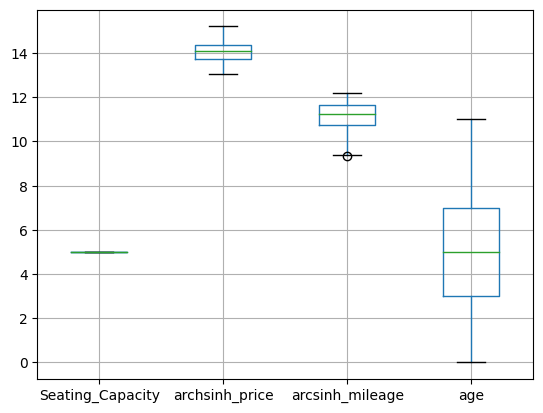

In [17]:
#  Use boxplot to check distribution of transformed data
cars.boxplot()

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


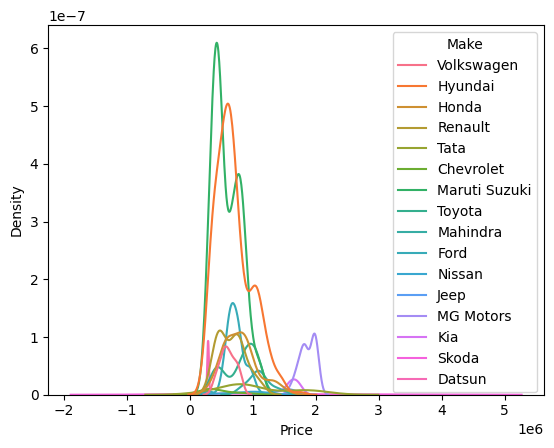

In [25]:
sns.kdeplot(data = data, x='Price',hue='Make')
data['Price'].groupby(data['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,70.0,14.238709,0.341065,13.356645,13.964361,14.275463,14.429599,14.938490
Hyundai,302.0,14.059743,0.400197,13.114331,13.783503,14.056884,14.330428,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,34.0,15.135917,0.063446,14.971763,15.099065,15.122762,15.190744,15.211260
Mahindra,2.0,14.668004,0.120444,14.582837,14.625421,14.668004,14.710588,14.753171


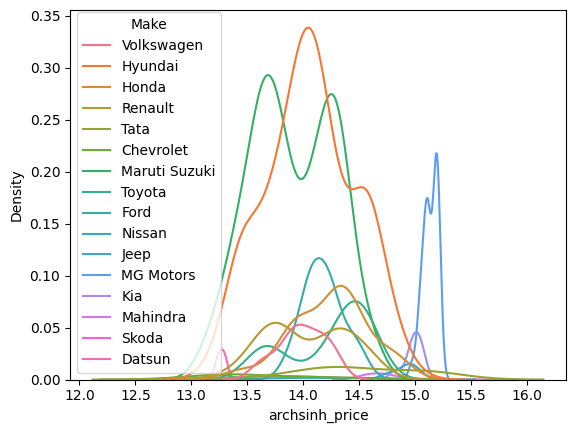

In [26]:
sns.kdeplot(data = cars, x = 'archsinh_price',hue = 'Make')
cars['archsinh_price'].groupby(cars['Make']).describe()

> On average, MG Motors cars are the most expensive, with a price of 1,869,457.14 dollars. Kias are the second most expensive at 1,614,750.00, then Jeeps at 1,499,500.0.

> In general, prices seem to be single peaked based on the kernel density plot, however, Maruti Suzuki and Toyota cars are an exception to this trend.

 3. Split the data into an 80% training set and a 20% testing set.

In [29]:
# Get the number of rows
N = cars.shape[0]

# Shuffle the DataFrame randomly
cars = cars.sample(frac=1, random_state=22)

# Define the size of the training set
train_size = int(0.8 * N)

# Split the dataset into training and testing sets
cars_train = cars[0:train_size]
cars_test = cars[train_size:]

# Extract the target variable for training and testing
y_train = cars_train['archsinh_price']
y_test = cars_test['archsinh_price']

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [34]:
# Make a model where you regress price on the numeric variables alone
from sklearn import linear_model

# Select the numeric variables for training data
X_train_n = cars_train.loc[:, var_n]

# Create a linear regression model and fit it to the training data
reg_n = linear_model.LinearRegression().fit(X_train_n, y_train)

# Select the numeric variables for testing data
X_test_n = cars_test.loc[:, var_n]

# Predict the target variable using the trained model
y_hat = reg_n.predict(X_test_n)

# Print the R-squared score for the numeric model
print('Numeric R^2: ', reg_n.score(X_test_n, y_test))

# Calculate and print the RMSE (Root Mean Squared Error) for the numeric model
rmse_n = np.sqrt(np.mean((y_test - y_hat)**2))
print('Numeric RMSE: ', rmse_n)

Numeric R^2:  0.3836779669126912
Numeric RMSE:  0.32107457181681637


In [35]:
# Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

# Create an empty DataFrame to store dummy variables
dummies = pd.DataFrame([])

# Iterate through categorical variables
for var in var_cat:
    # Create dummy variables for the current categorical variable
    new_dummies = pd.get_dummies(cars.loc[:, var], drop_first=True, dtype=int)

    # Concatenate the new dummy variables with existing ones
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

# Separate the dummy variables into training and testing sets
X_train_c = dummies.iloc[0:train_size, :]
X_test_c = dummies.iloc[train_size:, :]

# Create and fit a linear regression model using categorical variables
reg_c = linear_model.LinearRegression().fit(X_train_c, y_train)

# Predict the target variable using the trained model
y_hat_c = reg_c.predict(X_test_c)

# Print the R-squared score for the categorical model
print('Categorical R^2: ', reg_c.score(X_test_c, y_test))

# Calculate and print the RMSE (Root Mean Squared Error) for the categorical model
rmse_c = np.sqrt(np.mean((y_test - y_hat_c)**2))
print('Categorical RMSE: ', rmse_c)


Categorical R^2:  0.5734121790876145
Categorical RMSE:  0.26711992940768686


In [37]:
# Make a third model that combines all the regressors from the previous two
# Concatenate numeric and categorical features for training data
X_train_all = pd.concat([X_train_n, X_train_c], axis=1, ignore_index=True)

# Concatenate numeric and categorical features for testing data
X_test_all = pd.concat([X_test_n, X_test_c], axis=1, ignore_index=True)

# Create and fit a linear regression model using all features
reg_all = linear_model.LinearRegression().fit(X_train_all, y_train)

# Predict the target variable using the trained model
y_hat_all = reg_all.predict(X_test_all)

# Print the R-squared score for the model using all features
print('All R^2: ', reg_all.score(X_test_all, y_test))

# Calculate and print the RMSE (Root Mean Squared Error) for the model using all features
rmse_all = np.sqrt(np.mean((y_test - y_hat_all)**2))
print('All RMSE: ', rmse_all)

All R^2:  0.8008915444412689
All RMSE:  0.1824932968362016


> The joint model with numeric and categorical variables performs the best, achieving an $R^2$ of 0.80 and `RMSE` of 0.18.

> The categorical model with numeric and categorical variables performs second best, achieving an $R^2$ of 0.57 and `RMSE` of 0.27.

> The numeric model with numeric and categorical variables achieves an $R^2$ of 0.38 and `RMSE` of 0.32.

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Iterate over different polynomial degrees
for d in np.arange(1, 10):
    # Create polynomial features expander
    expander = PolynomialFeatures(degree=d, include_bias=False)

    # Transform the numeric test features to polynomial features
    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns=names)

    # Transform the numeric train features to polynomial features
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns=names)

    # Reset indices for consistency
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)

    # Concatenate polynomial numeric and categorical train features
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    # Reset indices for consistency
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)

    # Concatenate polynomial numeric and categorical test features
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    # Fit a linear regression model using all features
    reg_all = linear_model.LinearRegression().fit(X_train_all, y_train)

    # Print R-squared for the current polynomial degree
    print(d, ' R^2: ', reg_all.score(X_test_all, y_test))

    # Predict the target variable using the trained model
    y_hat_all = reg_all.predict(X_test_all)

    # Calculate and print RMSE for the current polynomial degree
    rmse_all = np.sqrt(np.mean((y_test - y_hat_all)**2))
    print(d, 'RMSE: ', rmse_all)

1  R^2:  0.8008915444412689
1 RMSE:  0.1824932968362016
2  R^2:  0.8028279804849652
2 RMSE:  0.18160370623890557
3  R^2:  0.797452833358641
3 RMSE:  0.18406243002985584
4  R^2:  0.7932601807374235
4 RMSE:  0.18595768514379576
5  R^2:  0.8015441948436453
5 RMSE:  0.18219395724887402
6  R^2:  0.7373260238102495
6 RMSE:  0.20960932010652264
7  R^2:  0.8017488513432875
7 RMSE:  0.18209998973926095
8  R^2:  -0.271373949821758
8 RMSE:  0.461146290491779
9  R^2:  -254.02312024845205
9 RMSE:  6.53118285149165


The best degree is 2 with an $R^2$ of 0.80 and `RMSE` of 0.182. After that, performance falls until $R^2$ becomes negative at degree = 8.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='archsinh_price'>

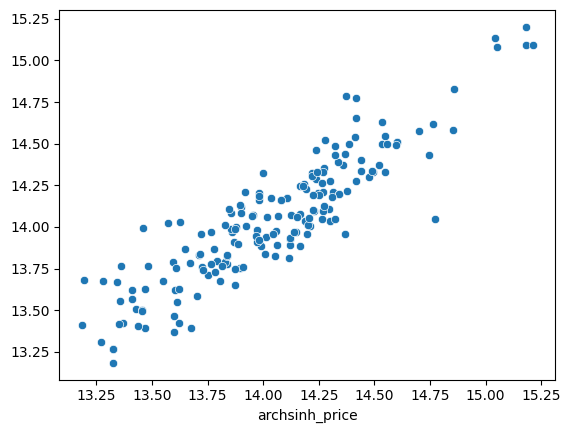

In [46]:
# Best degree
d = 2

# Create polynomial features expander
expander = PolynomialFeatures(degree=d, include_bias=False)

# Transform the numeric test features to polynomial features
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns=names)

# Transform the numeric train features to polynomial features
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns=names)

# Reset indices for consistency
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)

# Concatenate polynomial numeric and categorical train features
X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

# Reset indices for consistency
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)

# Concatenate polynomial numeric and categorical test features
X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

# Fit a linear regression model using all features
reg_all = linear_model.LinearRegression().fit(X_train_all, y_train)

# Predict the target variable using the trained model on the test data
y_hat_all = reg_all.predict(X_test_all)

# Calculate the residuals
residuals = y_test - y_hat_all

# Plotting the scatterplot between true values and predicted values
sns.scatterplot(x=y_test, y=y_hat_all)

> The predicted values and true values do roughly line up along the diagonal.

<Axes: xlabel='archsinh_price', ylabel='Density'>

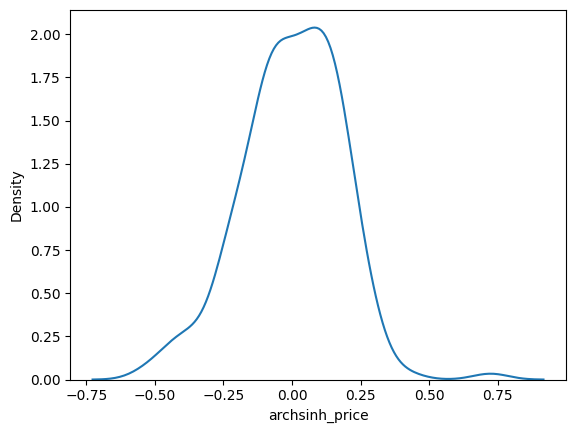

In [47]:
sns.kdeplot(residuals)

> The residuals look roughly bell-shaped around zero. There is a slight second peak on the right tail, however, it generally follows a clean normal model.